In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Path: notebook.ipynb

In [122]:
df = pd.read_csv('data/ah.csv')
df.head()

,name,score,Energy,Fat,Saturated Fat,Unsaturated Fat,Carbohydrates,Suger,Fiber,Protein,Salt,Calcium,Vitamin B2,Vitamin C
0,AH Rundergehakt,C,228.0,16.0,7.1,6.9,0.9,0.0,0.0,20.0,0.2,NaN,NaN,NaN
1,AH Scharrel kipfiletblokjes,A,114.0,1.2,0.5,0.7,0.0,0.0,1.6,25.0,0.1,NaN,NaN,NaN
2,Meester & Zn. Gerookte spekreepjes,E,305.0,27.0,11.0,16.0,0.5,0.5,0.0,15.0,3.0,NaN,NaN,NaN
3,AH Scharrel kipfilet 2 stuks,A,114.0,1.2,0.5,0.7,0.0,0.0,1.6,25.0,0.1,NaN,NaN,NaN
4,AH Gerookte spekreepjes,E,282.0,24.0,9.0,15.0,0.5,0.5,0.0,16.0,2.0,NaN,NaN,NaN


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             135 non-null    object 
 1   score            135 non-null    object 
 2   Energy           135 non-null    float64
 3   Fat              135 non-null    float64
 4   Saturated Fat    135 non-null    float64
 5   Unsaturated Fat  132 non-null    float64
 6   Carbohydrates    135 non-null    float64
 7   Suger            135 non-null    float64
 8   Fiber            135 non-null    float64
 9   Protein          135 non-null    float64
 10  Salt             135 non-null    float64
 11  Calcium          15 non-null     float64
 12  Vitamin B2       4 non-null      float64
 13  Vitamin C        10 non-null     float64
dtypes: float64(12), object(2)
memory usage: 14.9+ KB


In [124]:
df.describe()

,Energy,Fat,Saturated Fat,Unsaturated Fat,Carbohydrates,Suger,Fiber,Protein,Salt,Calcium,Vitamin B2,Vitamin C
count,135.000000,135.000000,135.000000,132.000000,135.000000,135.000000,135.000000,135.000000,135.000000,15.000000,4.000000,10.000000
mean,199.155556,11.409630,5.494815,5.525758,11.316296,3.404519,1.000222,12.278963,0.984370,0.126221,0.000215,0.037910
std,143.733110,13.773303,8.643273,6.307195,22.511341,8.392227,2.570194,8.445346,0.985857,0.015122,0.000047,0.032906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.106320,0.000150,0.009100
25%,72.500000,1.400000,0.500000,0.650000,0.900000,0.200000,0.000000,3.700000,0.100000,0.120000,0.000202,0.024000
50%,168.000000,5.600000,2.100000,2.800000,2.900000,1.000000,0.000000,13.000000,0.500000,0.120000,0.000225,0.024000
75%,291.000000,19.000000,8.200000,8.500000,5.600000,4.000000,0.700000,19.000000,1.900000,0.126500,0.000237,0.044250
max,744.000000,82.000000,57.000000,25.000000,87.000000,81.000000,14.000000,31.000000,3.000000,0.163000,0.000260,0.124000


## Data Visualization

In [125]:
feature_var = ['Energy', 'Fat', 'Saturated Fat', 'Carbohydrates', 'Suger','Protein', 'Salt', 'Fiber']
selected_cols = ['score', *feature_var]
df = df[selected_cols]
df.head()

,score,Energy,Fat,Saturated Fat,Carbohydrates,Suger,Protein,Salt,Fiber
0,C,228.0,16.0,7.1,0.9,0.0,20.0,0.2,0.0
1,A,114.0,1.2,0.5,0.0,0.0,25.0,0.1,1.6
2,E,305.0,27.0,11.0,0.5,0.5,15.0,3.0,0.0
3,A,114.0,1.2,0.5,0.0,0.0,25.0,0.1,1.6
4,E,282.0,24.0,9.0,0.5,0.5,16.0,2.0,0.0


<Axes: xlabel='score', ylabel='Count'>

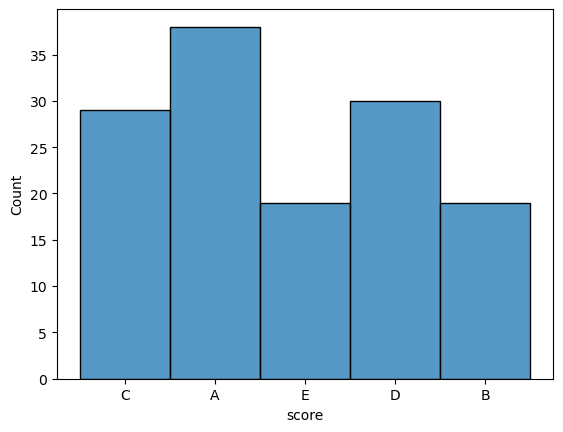

In [126]:
# A histogram plot for each score-label
sns.histplot(data=df, x=df['score'])

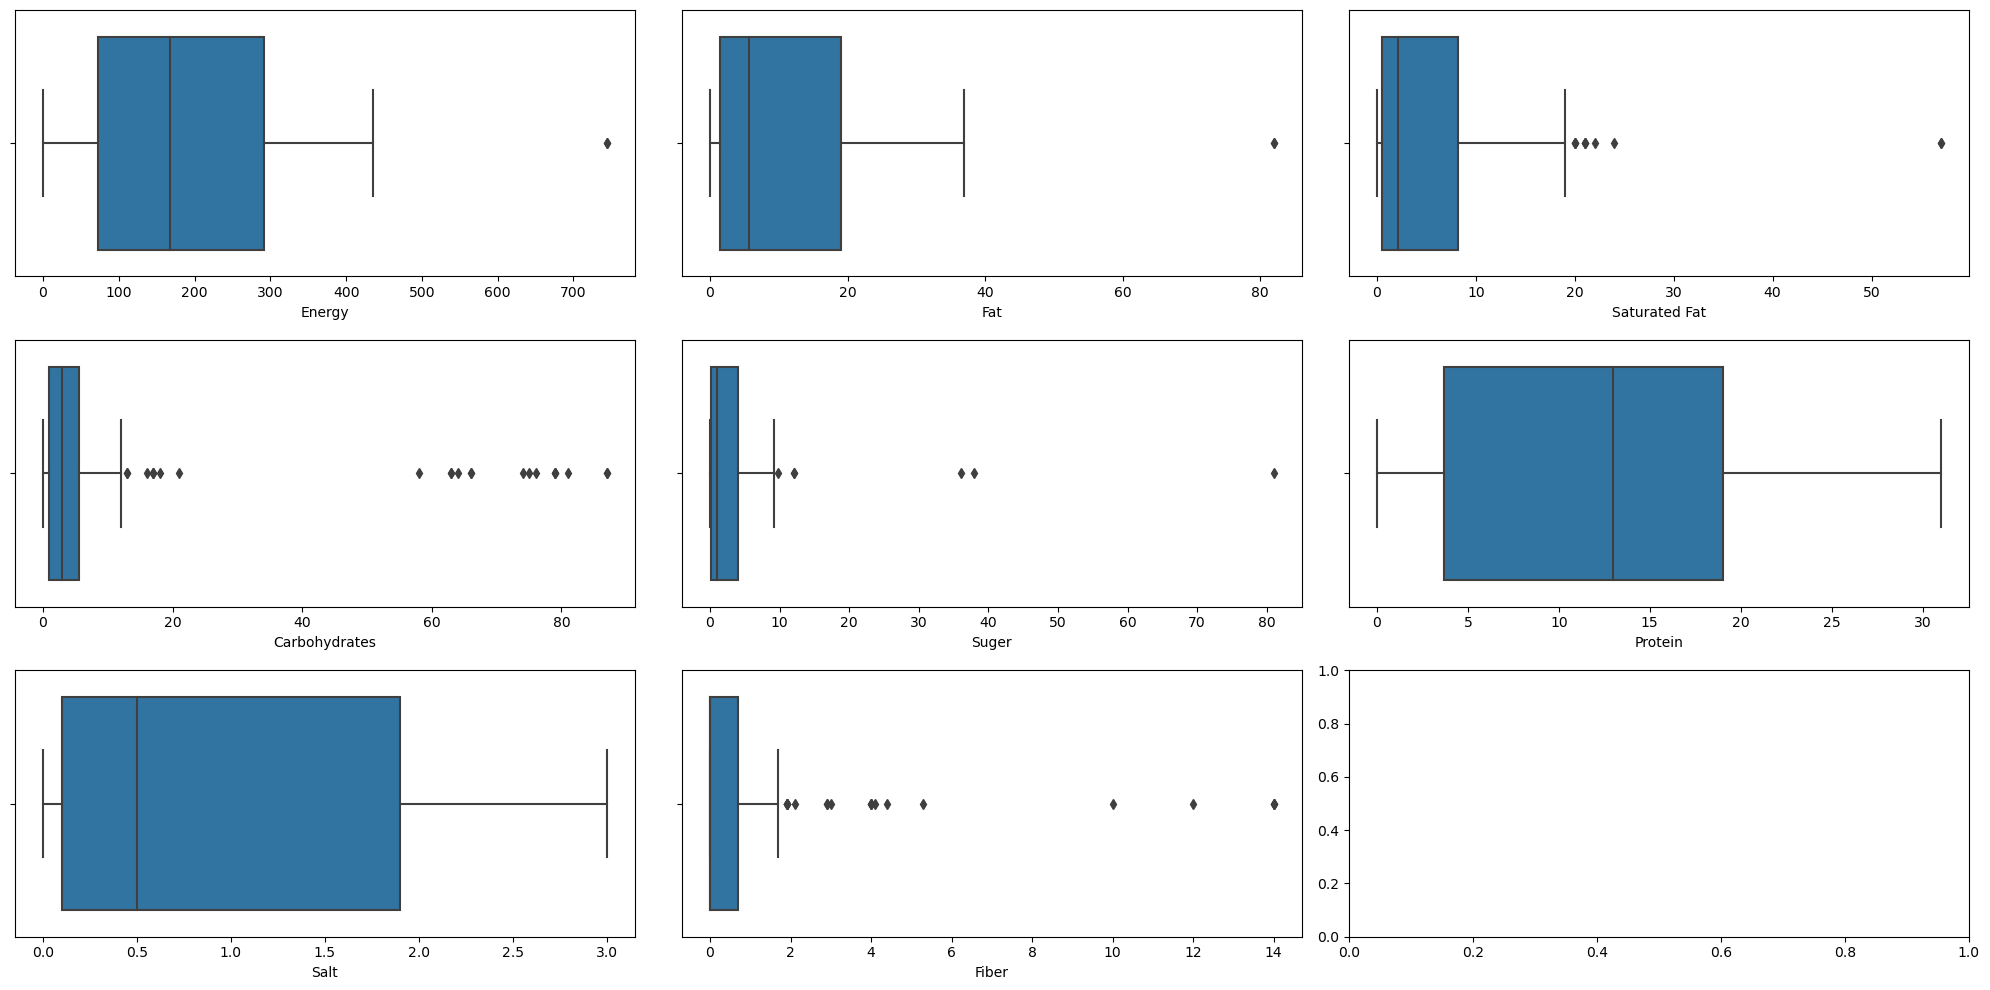

In [127]:

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for i, var in enumerate (feature_var):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

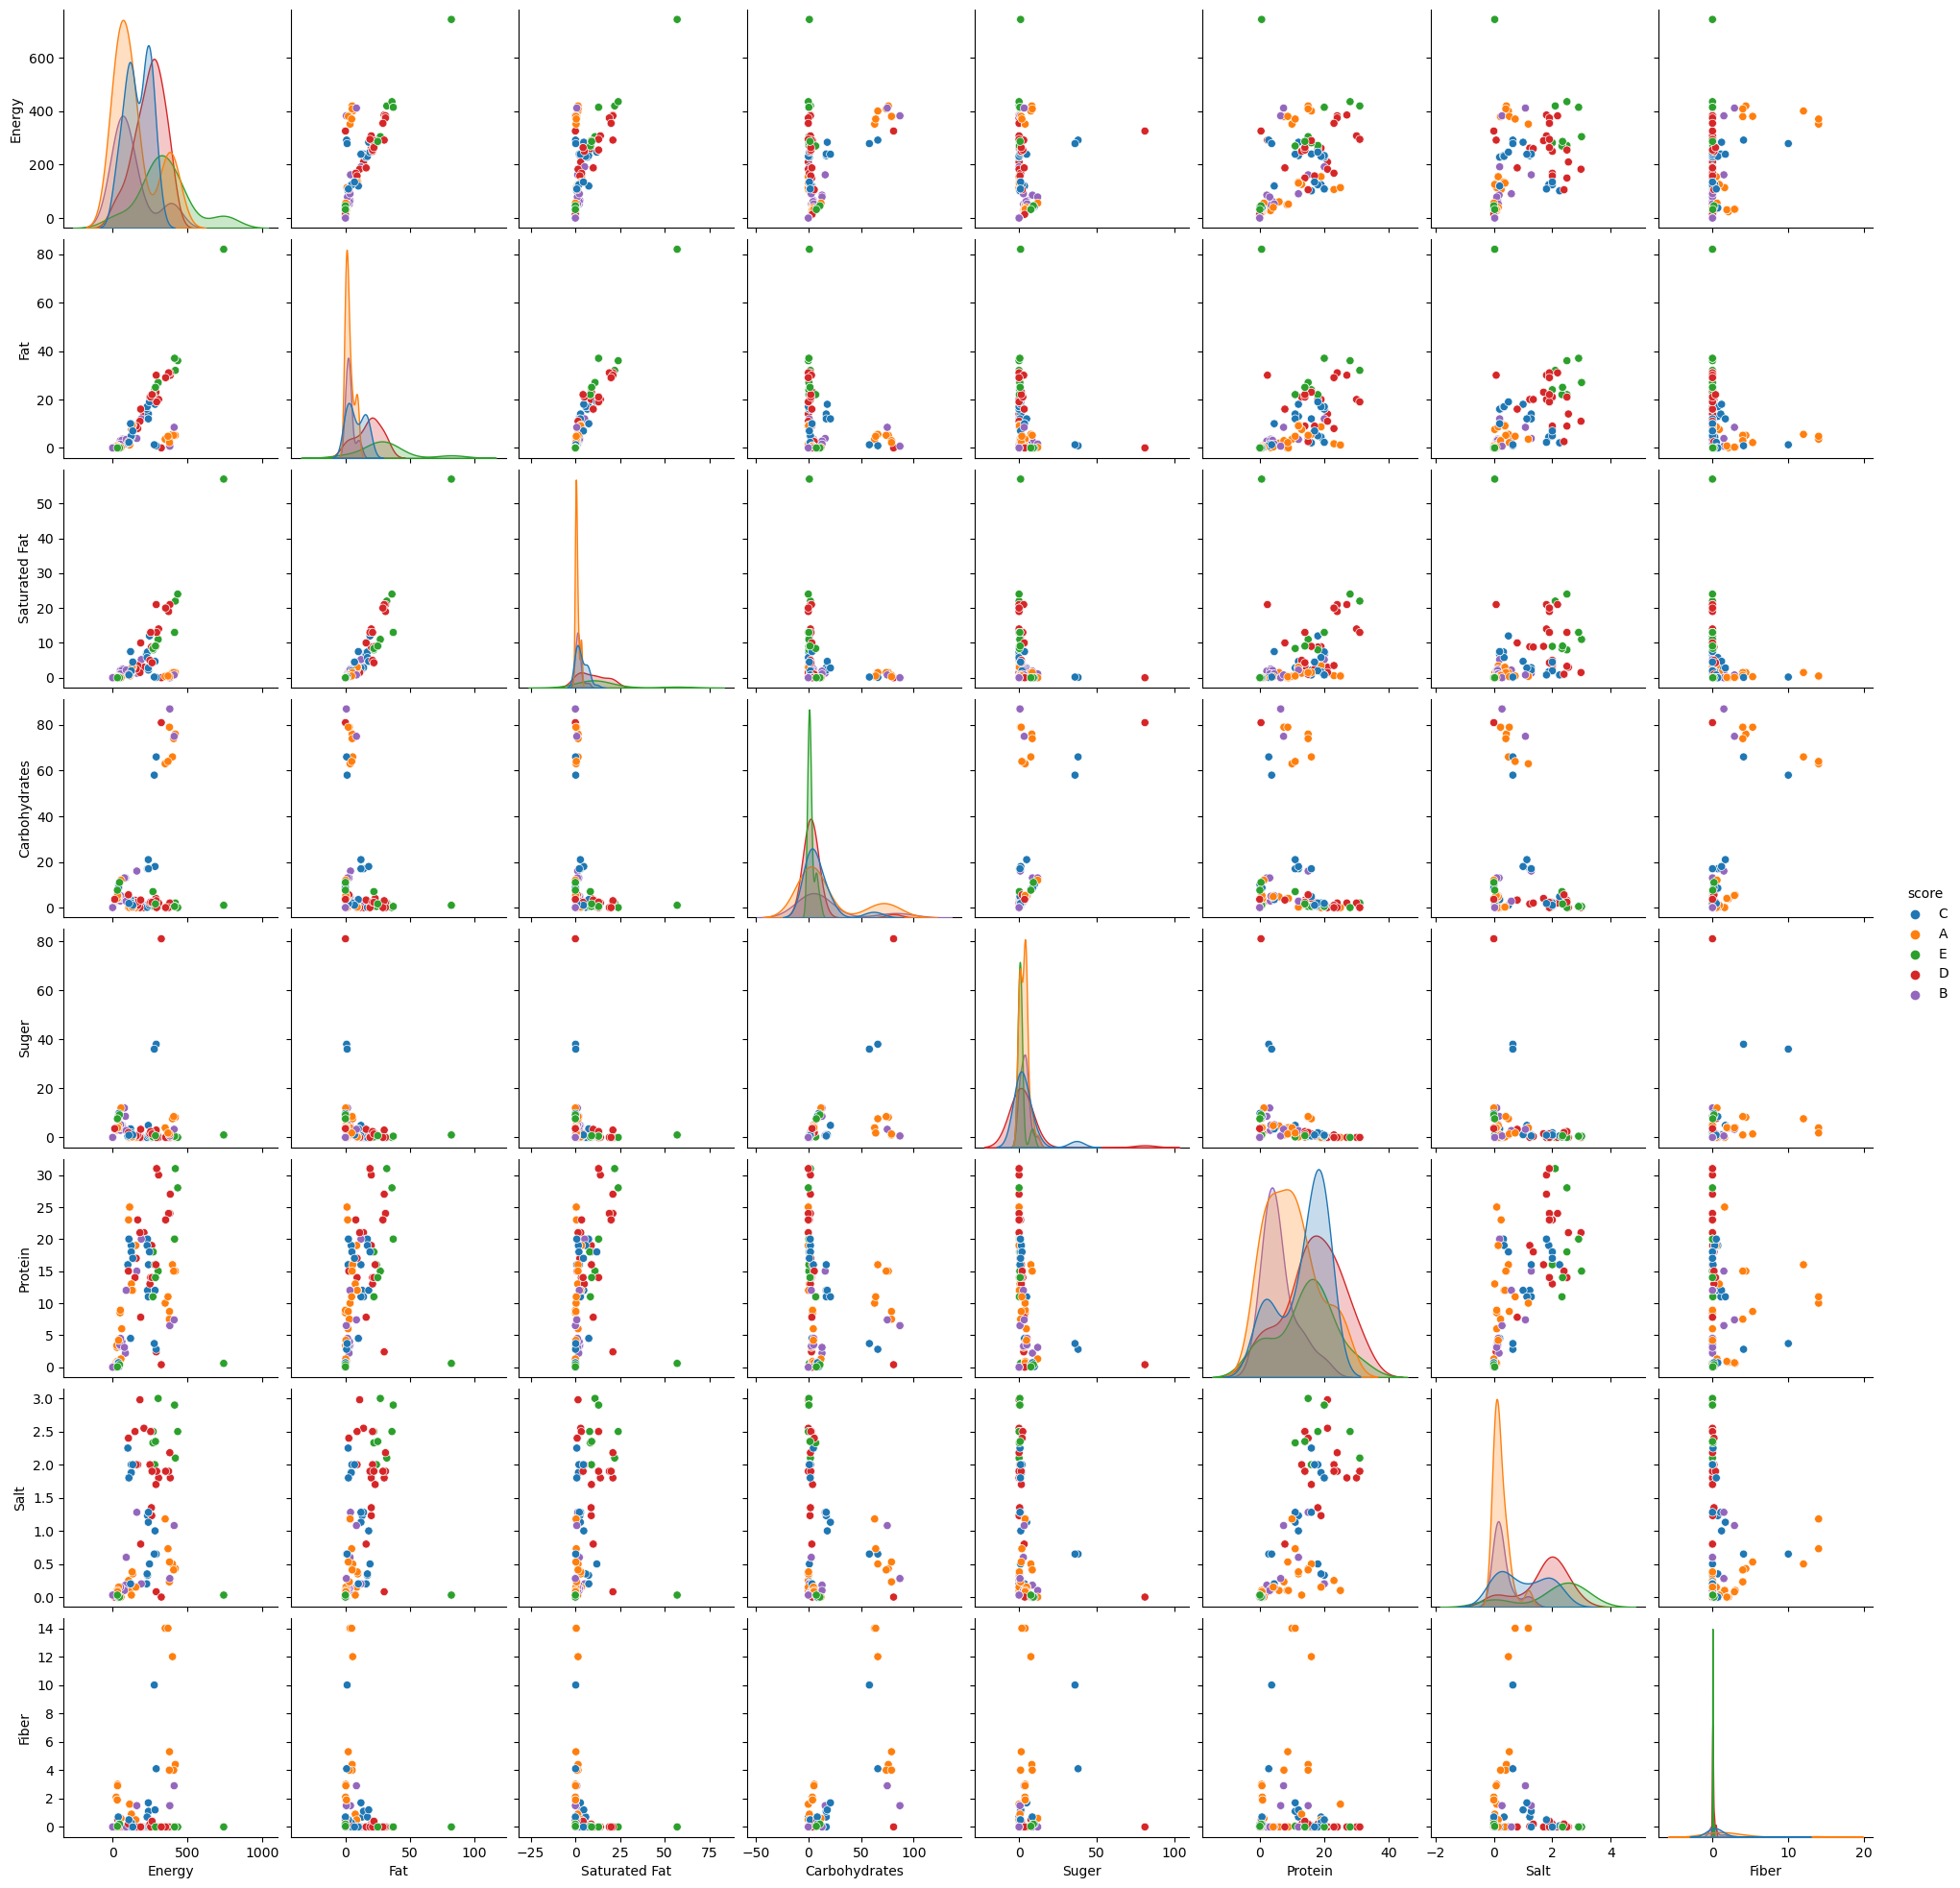

In [128]:
# analyze feature_var plots  hue of score

sns.pairplot(data=df, hue='score', vars=feature_var)


/var/folders/43/5lj7tsms4q1dq44ykfhnkplm0000gn/T/ipykernel_60669/2625292077.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2g', annot=True)


<Axes: >

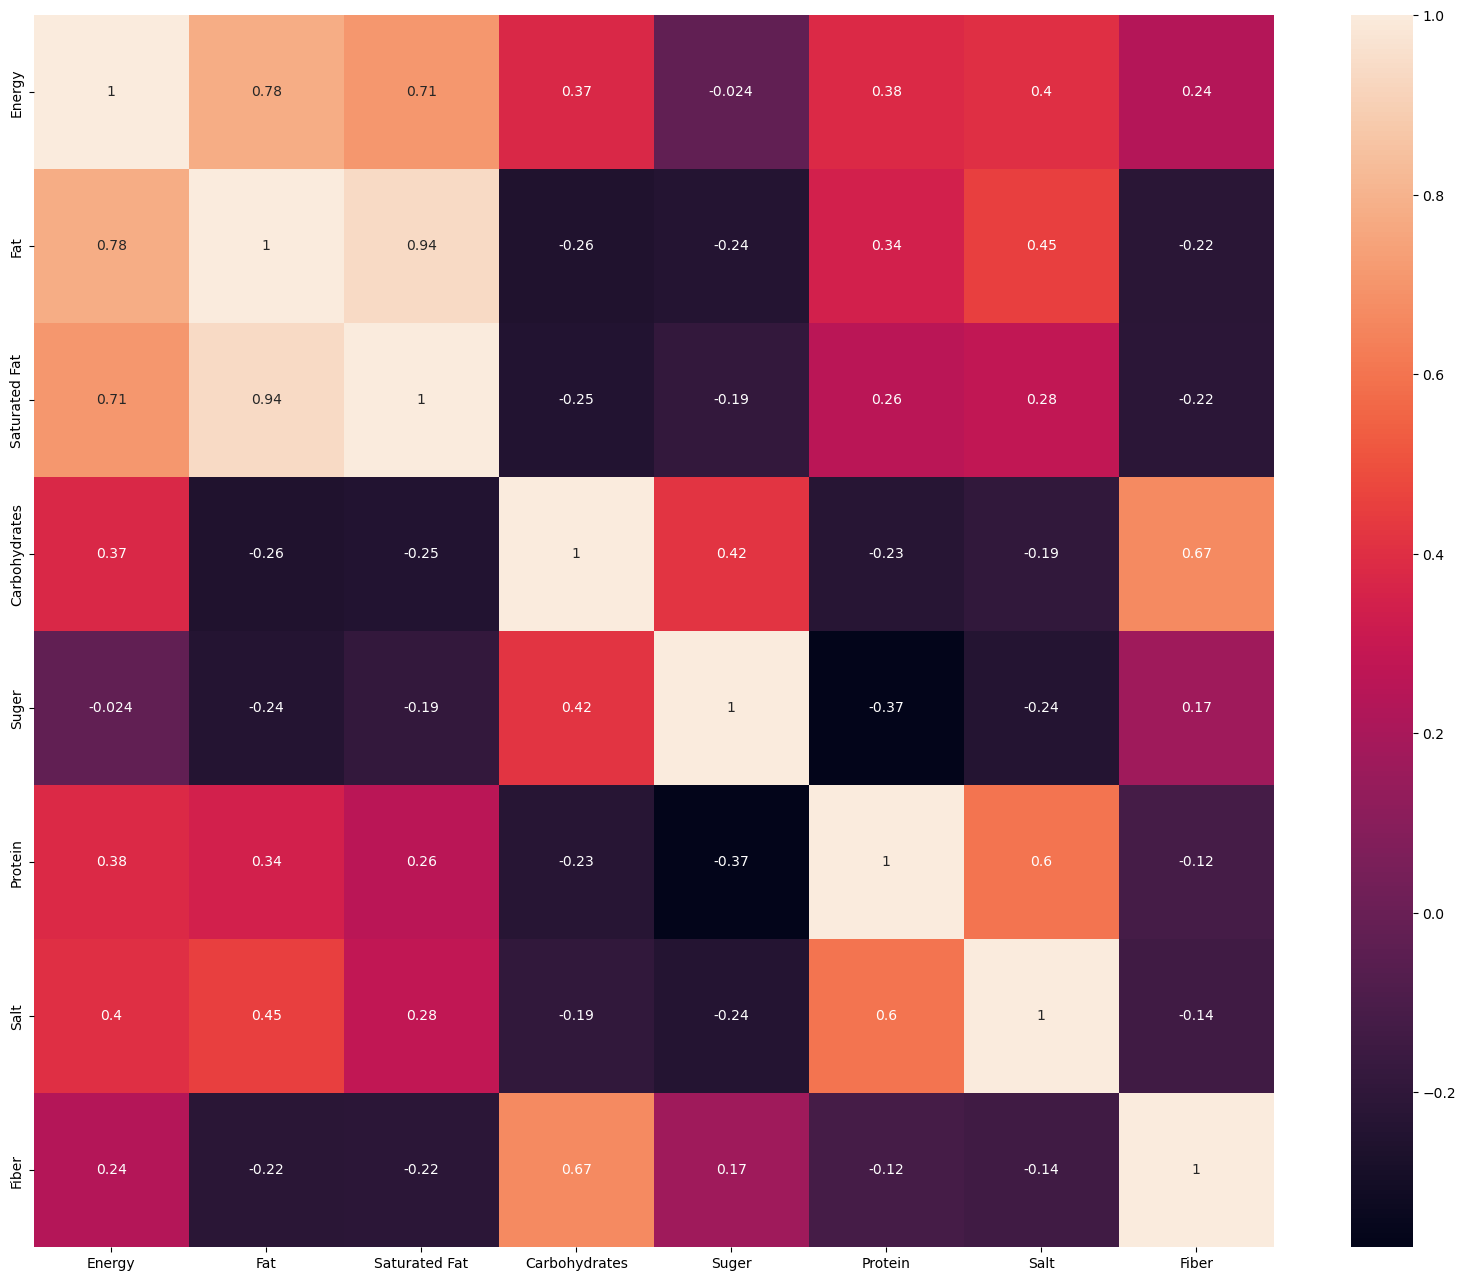

In [129]:
# Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## Data Preprocessing

In [130]:
# Handle Null data
df = df.dropna()
df.isnull().sum()

score            0
Energy           0
Fat              0
Saturated Fat    0
Carbohydrates    0
Suger            0
Protein          0
Salt             0
Fiber            0
dtype: int64

## Machine Learning Training

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

X = df.drop('score', axis=1)
y = df['score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalize X values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
lrc = LogisticRegression()
lrc.fit(X_train, y_train)


LogisticRegression()

In [133]:
y_pred = lrc.predict(X_test)

print('accuracy_score: ', (accuracy_score(y_test, y_pred)))
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

accuracy_score:  0.7037037037037037
F-1 Score :  0.7037037037037037
Precision Score :  0.7037037037037037
Recall Score :  0.7037037037037037


### Decision Tree

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [135]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier( max_depth=grid_search.best_params_['max_depth'], \
                                min_samples_leaf=grid_search.best_params_['min_samples_leaf'], \
                                min_samples_split=grid_search.best_params_['min_samples_split'], \
                                random_state=0)
# train the model
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=7, random_state=0)

In [136]:
# test the model
y_pred = dtree.predict(X_test)

print('accuracy_score: ', (accuracy_score(y_test, y_pred)))
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

accuracy_score:  0.7777777777777778
F-1 Score :  0.7777777777777778
Precision Score :  0.7777777777777778
Recall Score :  0.7777777777777778


### Random Forests

In [137]:
# Random Forest implementation

from sklearn.ensemble import RandomForestClassifier

params_dt = {
    'n_estimators': [100, 300],
    'max_depth': [3, 4, 5, 6],
    'max_features': [0.2, 0.5, 0.8]
}

# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dt = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                            param_grid=params_dt,
                            scoring='accuracy',
                            cv=10,
)

# Fit 'grid_dt' to the training data
grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from 'grid_dt'
best_hyperparams = grid_dt.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 6, 'max_features': 0.2, 'n_estimators': 300}


In [138]:
rfc = RandomForestClassifier(n_estimators=best_hyperparams['n_estimators'], \
                            max_depth=best_hyperparams['max_depth'], \
                            max_features=best_hyperparams['max_features'], \
                            random_state=0)


rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=0.2, n_estimators=300,
                       random_state=0)

In [139]:
y_pred = rfc.predict(X_test)

print('accuracy_score: ', (accuracy_score(y_test, y_pred)))
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

accuracy_score:  0.8148148148148148
F-1 Score :  0.8148148148148148
Precision Score :  0.8148148148148148
Recall Score :  0.8148148148148148


### Support Vector Machine

In [145]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)


SVC(kernel='linear')

In [146]:
y_pred = svc.predict(X_test)

print('accuracy_score: ', (accuracy_score(y_test, y_pred)))
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

accuracy_score:  0.6666666666666666
F-1 Score :  0.6666666666666666
Precision Score :  0.6666666666666666
Recall Score :  0.6666666666666666


### K-Nearest Neighbor

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = np.arange(1, 20)
train_scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    train_scores.append(np.mean(score))

In [143]:
# sns.lineplot(x=k_values, y=train_scores, marker='o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")

best_idx = np.argmax(train_scores)
best_k = k_values[best_idx]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [144]:
y_pred = knn.predict(X_test)

print('accuracy_score: ', (accuracy_score(y_test, y_pred)))
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))

accuracy_score:  0.8148148148148148
F-1 Score :  0.8148148148148148
Precision Score :  0.8148148148148148
Recall Score :  0.8148148148148148
